In [15]:
'''This script demonstrates how to build a variational autoencoder
with Keras and deconvolution layers.
# Reference
- Auto-Encoding Variational Bayes
  https://arxiv.org/abs/1312.6114
'''
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras.layers import Input, Dense, Lambda, Flatten, Reshape, Conv1D
from keras.layers import Conv2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils, plot

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [4]:
context = data.init()
n = 2
multiTrack = True
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = True
<meta message track_name name='01 16th Snare\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
note_on channel=0 no

In [5]:
n = 100
min_f = 3
max_f = 15
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
# x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, 
    n_polyrythms=1,
    n_channels=midi.N_NOTES,
    multiTrack=multiTrack)

note_on channel=0 note=60 velocity=127 time=0.009375
note_on channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.003125
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_on channel=0 note=61 velocity=127 time=0.06041666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.06041666666666667
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.05416666666666667
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=61 velocit

note_on channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0.03229166666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.009375
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.02395833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.003125
note_on channel=0 note=62 velocity=127 t

note_on channel=0 note=61 velocity=127 time=0.0125
note_on channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=61 velocity=127 time=0.010416666666666666
note_off channel=0 note=60 velocity=127 time=0.009375
note_on channel=0 note=62 velocity=127 time=0.03958333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_on channel=0 note=60 velocity=127 time=0.052083333333333336
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 vel

note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.028125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.015625
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.034375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.014583333333333334
note_on channel=0 note=62 velocit

note_on channel=0 note=60 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.030208333333333334
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.03229166666666666
note_on channel=0 note=62 velocity=127 time=0.0177083333333333

note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0375
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.025
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_on channel=0 note=61 velocity=127 time=0.04479166666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_on channel=0 note=60 velocity=127 time=0.00104166666666666

note_on channel=0 note=60 velocity=127 time=0.07916666666666666
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.017708333333333333
note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=61 velocity=127 time=0.04583333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.022916666666666665
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.08333333333333333
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_on channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.06354166666666666
note_off channel=0 note=60 velocit

note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.028125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_on channel=0 note=62 velocity=127 time=0.017708333333333333
note_off channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.017708333333333333
note_on channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_on channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 v

note_on channel=0 note=61 velocity=127 time=0.013541666666666667
note_on channel=0 note=62 velocity=127 time=0
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0
note_on channel=0 note=60 velocity=127 time=0.022916666666666665
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.041666666666666664
note_on channel=0 note=61 velocity=127 time=0.007291666666666667
note_on channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.008333333333333333
note_on channel=0 note=60 velocity=127 time=0.057291666666666664
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_on channel=0 note=61 velocity=127 time=0.007291666666666667
note_

note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.029166666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_on channel=0 note=60 velocity=127 time=0.051041666666666666
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.003125
note_on channel=0 note=60 velocity=127 time=0.036458333333333336
note_off channel=0 note=60 velocity=127 time=0.019791666666666666

note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_on channel=0 note=62 velocity=127 time=0.030208333333333334
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.021875
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.003125
note_on channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.010416666666666666
note_on channel=0 note=62 velocity=1

note_on channel=0 note=61 velocity=127 time=0.05520833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.005208333333333333
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=61 velocity=127 time=0.026041666666666668
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.05520833333333333
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.052083333333333336
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03854166666666667
note_on channel=0 note=61 velocit

note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.046875
note_on channel=0 note=62 velocity=127 time=0.017708333333333333
note_off channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.017708333333333333
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.035416666666666666
note_on channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.01875
note_on channel=0 note=62 velocity=127 time=0.046875
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=6

note_on channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.01875
note_on channel=0 note=61 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.025
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_on channel=0 note=61 velocity=127 time=0.05416666666666667
note_on channel=0

note_on channel=0 note=60 velocity=127 time=0.046875
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=60 velocity=127 time=0.04583333333333333
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_on channel=0 note=60 velocity=127 time=0.035416666666666666
note_on channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_on channel=0 note=60 velocity=127 time=0.026041666666666668
note_off channel=0 note=60 velocity=127 time=0.019791

note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.065625
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_on channel=0 note=62 velocity=127 time=0.06145833333333333
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666


note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0375
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.04583333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.015625
note_on channel=0 note=62 velocity=127 time=0.03229166666666666
note_on channel

note_on channel=0 note=60 velocity=127 time=0.009375
note_on channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.016666666666666666
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.03125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.035416666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
n

note_on channel=0 note=62 velocity=127 time=0.036458333333333336
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 veloci

note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.06666666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_on channel=0 note=61 velocity=127 time=0.02395833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.06145833333333333
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.

note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.07708333333333334
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_on channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03854166666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04479166666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.036458333333333336
note_off channel=0 note=61 velocity=127 time=0.

note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.017708333333333333
note_on channel=0 note=62 velocity=127 time=0.028125
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.01875
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=1

note_on channel=0 note=60 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.041666666666666664
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.06145833333333333
note_on channel=0 note=60 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_off channel=0 note=60 velocity=127 time=0
note_on channel=0 note=60 velocity=127 time=0.06145833333333333
note_on channel=0 note=61 velocity=127 time=0.010416666666666666
note_on channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0
note_off channel=0 note=61 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0.04166666

note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_on channel=0 note=60 velocity=127 time=0.020833333333333332
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.009375
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 

note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.058333333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.041666666666666664
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_on channel=0 note=60 velocity=127 time=0.06770833333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0

note_off channel=0 note=60 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.06145833333333333
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.017708333333333333
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.071875
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.05
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.03958333333333333
note_off channel=0 n

note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04375
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04583333333333333
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04791666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time

note_off channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_on channel=0 note=60 velocity=127 time=0.03333333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.01666666

note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.03958333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04479166666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.08854166666666667
note_on channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.015625
note_on channel=0 note=60 velocity=127 time=0.040625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=

note_on channel=0 note=60 velocity=127 time=0.03958333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.059375
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.017708333333333333
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.025
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.059375
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=

In [8]:
# z = x_train
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2])
# x_train.shape

(100, 150, 3)

In [39]:
n = 3
total = 1000 * 10
x_test = x_train[n:]
x_train = np.concatenate([x_train[:n] for _ in range(int(total/n))])

In [40]:
x_train.shape

(9999, 150, 3)

In [41]:
img_dims = (28,28,1)
img_dims = x_train[0].shape
img_dims

(150, 3)

In [42]:
# input image dimensions
img_rows, img_chns = img_dims
# number of convolutional filters to use
filters = 64
# convolution kernel size
num_conv = 3

batch_size = 100
if K.image_data_format() == 'channels_first':
    original_img_size = (img_chns, img_rows)
else:
    original_img_size = (img_rows, img_chns)
latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0
epochs = 5

In [43]:
x = Input(shape=original_img_size)

timesteps = original_img_size[-2]
notes = original_img_size[-1]
    
    # Convolve & Pool
h = x
h = Conv1D(32, kernel_size=2, strides=2, activation='relu', padding='same')(h)
# h = Conv1D(32, kernel_size=2, strides=1, activation='relu', padding='same')(h)
h = Conv1D(64, kernel_size=2, strides=1, activation='relu', padding='same')(h)

    # Dense layers
h = Flatten()(h)
h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)    
#     h = Dropout(0.1)(h) # uncomment when using larger batches
#     h = Dense(intermediate_dim, activation='relu')(h)
    # h = Dense(intermediate_dim, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(h)

    # Z Mean, Variance
z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'
    
# encoder_output = [z_mean, z_log_var]

In [44]:
# encoder_model = Model(x, [z_mean, z_log_var])
# encoder_model.summary()

In [45]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var) * epsilon

In [ ]:
# z = Lambda(sampling)(encoder_model)
z = Lambda(sampling)([z_mean, z_log_var])

In [46]:
# we instantiate these layers separately so as to reuse them later
decoder_hid = Dense(intermediate_dim, activation='relu')
decoder_upsample = Dense(filters * 14 * 14, activation='relu')

if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 14, 14)
else:
    output_shape = (batch_size, 14, 14, filters)

In [47]:
decoder_reshape = Reshape(output_shape[1:])
decoder_deconv_1 = Conv2DTranspose(filters,
                                   kernel_size=num_conv,
                                   padding='same',
                                   strides=1,
                                   activation='relu')
decoder_deconv_2 = Flatten()

if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 29, 29)
else:
    output_shape = (batch_size, 29, 29, filters)
decoder_deconv_3_upsamp = Dense(np.prod(x_train.shape[1:]))
decoder_mean_squash = Reshape(x_train.shape[1:])

hid_decoded = decoder_hid(z)
up_decoded = decoder_upsample(hid_decoded)
reshape_decoded = decoder_reshape(up_decoded)
deconv_1_decoded = decoder_deconv_1(reshape_decoded)
deconv_2_decoded = decoder_deconv_2(deconv_1_decoded)
x_decoded_relu = decoder_deconv_3_upsamp(deconv_2_decoded)
x_decoded_mean_squash = decoder_mean_squash(x_decoded_relu)

In [48]:
# instantiate VAE model
vae = Model(x, x_decoded_mean_squash)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 150, 3)       0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 75, 32)       224         input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 75, 64)       4160        conv1d_4[0][0]                   
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 4800)         0           conv1d_5[0][0]                   
__________________________________________________________________________________________________
dense_9 (D

In [49]:
# Compute VAE loss
# no img_cols!
xent_loss = img_rows * metrics.binary_crossentropy(
    K.flatten(x),
    K.flatten(x_decoded_mean_squash))
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)                

vae.compile(optimizer='rmsprop')
# vae.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Output "reshape_8" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_8" during training.
  # Remove the CWD from sys.path while we load stuff.


In [50]:
# train the VAE on MNIST digits
# (x_train, _), (x_test, y_test) = mnist.load_data()
x_test = x_train[-100:]
y_test = x_test

In [51]:
x_train.shape

(9999, 150, 3)

In [52]:
x_train = x_train[:1000]

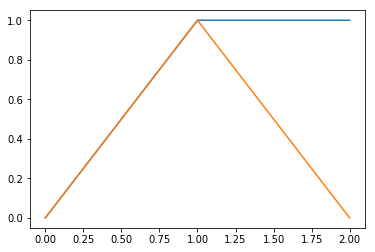

In [53]:
plt.plot(x_train[0,14])
plt.plot(x_train[0,18])

In [54]:
# x_train = x_train.astype('float32')# / 255.
# x_train = x_train.reshape((x_train.shape[0],) + original_img_size)
# x_test = x_test.astype('float32')# / 255.
# x_test = x_test.reshape((x_test.shape[0],) + original_img_size)
print('x_train.shape:', x_train.shape)

x_train.shape: (1000, 150, 3)


In [55]:
history = vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 4s 4ms/step - loss: 262.5367 - val_loss: 147.9805
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 146.8758 - val_loss: 148.9774
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 141.3571 - val_loss: 121.4415
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 116.0272 - val_loss: 97.2122
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 96.3138 - val_loss: 89.1576


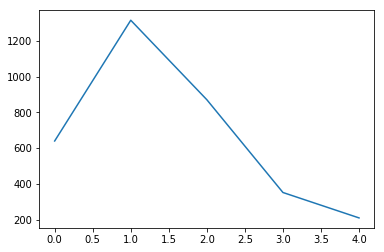

In [32]:
plt.plot(history.history['loss'])

In [193]:
# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

In [194]:
x_test.shape

(100, 150, 3, 1)

In [195]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
x_test_encoded.shape

(100, 2)

In [196]:
type(x_test_encoded[0,0])

numpy.float32

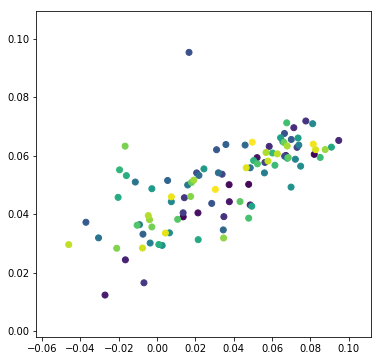

In [197]:
y_test = range(x_test.shape[0])
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)

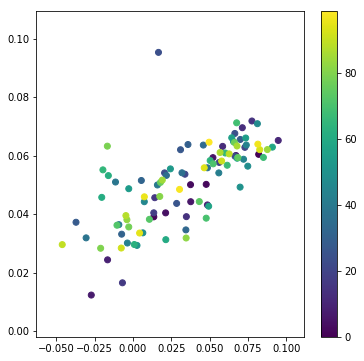

In [198]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [34]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_hid_decoded = decoder_hid(decoder_input)
_up_decoded = decoder_upsample(_hid_decoded)
_reshape_decoded = decoder_reshape(_up_decoded)
_deconv_1_decoded = decoder_deconv_1(_reshape_decoded)
_deconv_2_decoded = decoder_deconv_2(_deconv_1_decoded)
_x_decoded_relu = decoder_deconv_3_upsamp(_deconv_2_decoded)
_x_decoded_mean_squash = decoder_mean_squash(_x_decoded_relu)
generator = Model(decoder_input, _x_decoded_mean_squash)

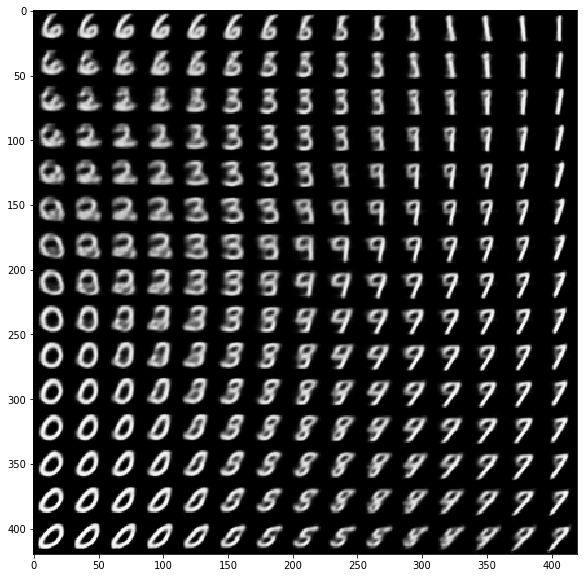

In [35]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = generator.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()